ABANDONED - the indicated search query below was determined to be too general and safe to ignore

Initial set up, including search terms.

In [1]:
import sys

In [2]:
import wosis
import pandas as pd
import metaknowledge as mk
import json

In [5]:
wos_config = wosis.load_config("../config/config.yml")

In [4]:
search_terms={
    "inclusive_kw":("sensitivity analysis", "uncertainty analysis", "uncertainty quantification", "uncertainty propagation", 
                    "local sensitivity analysis", "LSA", "one-at-a-time", 
                    "OAT", "global sensitivity analysis", "GSA", "all-at-a-time", "AAT"),
"subject_area":("ENVIRONMENTAL SCIENCES", "WATER RESOURCES", "ENGINEERING ENVIRONMENTAL", "INTERDISCIPLINARY APPLICATIONS"),
}

In [5]:
topics = [wosis.build_query(search_terms),]
topics

['TS=("sensitivity analysis" OR "uncertainty analysis" OR "uncertainty quantification" OR "uncertainty propagation" OR "local sensitivity analysis" OR "LSA" OR "one-at-a-time" OR "OAT" OR "global sensitivity analysis" OR "GSA" OR "all-at-a-time" OR "AAT") AND WC=("ENVIRONMENTAL SCIENCES" OR "WATER RESOURCES" OR "ENGINEERING ENVIRONMENTAL" OR "INTERDISCIPLINARY APPLICATIONS")']

In [6]:
topics = ['TS=(sensitivity analysis OR uncertainty analysis OR uncertainty quantification OR uncertainty propagation OR local sensitivity analysis OR LSA OR one-at-a-time OR OAT OR global sensitivity analysis OR GSA OR all-at-a-time OR AAT) AND WC=("ENVIRONMENTAL SCIENCES" OR "WATER RESOURCES" OR "ENGINEERING ENVIRONMENTAL" OR "INTERDISCIPLINARY APPLICATIONS")']

In [7]:
%%time
overwrite = False
id_to_query, query_recs = wosis.query(topics, overwrite, wos_config, time_span={'begin':'2000-01-01','end':'2017-12-31'})

Authenticated (SID: 7Cida8dIGmag6L8lBbi)
Found 40980 records


100%|█████████████████████████████████████████████████████████████████████████████| 410/410 [19:03<00:00,  2.89s/it]
c:\userdata\takuyai\owncloud\projects\wosis\wosis\query.py:303: UserWarning: Getting referenced works...
  warnings.warn("Getting referenced works...")
  0%|                                                                           | 3/40980 [00:01<5:58:50,  1.90it/s]c:\userdata\takuyai\owncloud\projects\wosis\wosis\query.py:356: UserWarning: A reference had more than 100 citations. This can take a long time and the cache file can get quite large...
  "A reference had more than {} citations. This can take a long time and the cache file can get quite large...".format(batch_size))
  6%|████▎                                                                  | 2499/40980 [37:02<18:44:59,  1.75s/it]

Server Error Msg: b"Server raised fault: '(ISE0002) Exception occurred processing request. Reason: Error received from a server supporting the Web service. Cause: Supporting server error message = [ID limit 2500 exceeded]. Supporting server error code = [Server.IDLimit]. Remedy: If this is a problem with your request, correct your request and submit it again. Otherwise, call customer support. '"
Authenticated (SID: 7DTZVuRYKA1D2MGTBWf)


 12%|████████▌                                                             | 4999/40980 [1:15:17<9:17:40,  1.08it/s]

Server Error Msg: b"Server raised fault: '(ISE0002) Exception occurred processing request. Reason: Error received from a server supporting the Web service. Cause: Supporting server error message = [ID limit 2500 exceeded]. Supporting server error code = [Server.IDLimit]. Remedy: If this is a problem with your request, correct your request and submit it again. Otherwise, call customer support. '"
Authenticated (SID: 6FO9hESKWldvrYHxJn7)


 13%|████████▊                                                             | 5160/40980 [1:17:42<6:22:40,  1.56it/s]

KeyboardInterrupt: 

In [ ]:
with open('tmp/example_query_id.txt', 'w') as file:
    file.write(json.dumps(id_to_query, indent=2))

In [8]:
query_id=list(id_to_query)[0]
print("Query ID: ", query_id, "\nQuery String:", id_to_query[query_id], "\n")
RC=mk.RecordCollection("tmp/{}.txt".format(query_id))
print("Corpora consists of", len(RC), "Publications")

Query ID:  756d39801152fe5f5f4ad3a3df9b6a30_2010-01-01-2017-12-31 
Query String: TS=("sensitivity analysis" OR "uncertainty analysis" OR "uncertainty quantification" OR "uncertainty propagation" OR "local sensitivity analysis" OR "LSA" OR "one-at-a-time" OR "OAT" OR "global sensitivity analysis" OR "GSA" OR "all-at-a-time" OR "AAT") AND WC=("ENVIRONMENTAL SCIENCES" OR "WATER RESOURCES" OR "ENGINEERING ENVIRONMENTAL" OR "INTERDISCIPLINARY APPLICATIONS") 

Corpora consists of 15754 Publications


In [9]:
RC = list(query_recs.values())[0]
print("Corpora consists of", len(RC), "Publications")

Corpora consists of 15754 Publications


In [10]:
from datetime import datetime
repset_df = pd.DataFrame(RC.forNLP(extraColumns=["AU", "SO", "DE"]))
repset_df = repset_df.drop(["keywords", "abstract"], axis=1)

assert len(repset_df.id.unique()) == len(repset_df.id), "Duplicate records found!"

repset_fn = "../data/{}.csv".format(query_id)
with open(repset_fn, 'w') as fn:
    fn.write("# Data from Clarivate Analytics' Web of Science, retrieved 5 December 2018\n")
    fn.write("# This file generated on {}\n".format(datetime.now().strftime("%Y-%m-%d %H:%M:%S")))
    repset_df.index.name = "item"
    repset_df.to_csv(fn)

In [11]:
# Helper functions for plotting
import wosis.analysis.plotting as wos_plot

# Analysis and search functions
from wosis.analysis import (preview_matches, search_records, keyword_matches, 
                            find_pubs_by_authors, preview_matches_by_keyword, get_unique_kw_titles,
                            remove_by_journals, remove_by_title)

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# This just helps make the plots look nicer
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=2.0)

<hr>

Search for paper of interest in the corpora.

In [12]:
corpora_df = pd.DataFrame(RC.forNLP(extraColumns=["AU", "SO", "DE", 'DOI']))
corpora_df.loc[corpora_df['DOI'] == '', 'DOI'].count()

corpora_df = corpora_df.loc[corpora_df['DOI'] != '', :]

In [13]:
corpora_df.loc[corpora_df['DOI'] == '10.1016/j.jocs.2015.08.008', :]

id  year  \
10432  WOS:000367774700005  2015   

                                                   title keywords  \
10432  Chaospy: An open source tool for designing met...            

                                                abstract  \
10432  the paper describes the philosophy design func...   

                                               AU  \
10432  Feinberg, Jonathan|Langtangen, Hans Petter   

                                     SO  \
10432  JOURNAL OF COMPUTATIONAL SCIENCE   

                                                      DE  \
10432  uncertainty quantification|polynomial chaos ex...   

                              DOI  
10432  10.1016/j.jocs.2015.08.008

<hr>

Further refinements to the corpora.

In [14]:
from wosis.analysis import remove_by_journals, remove_by_title

# List of unrelated Journals - will be matched by partial string
unrelated_jo = ['PSYCHOL', 'BIOINFO', 'BUSINESS INFORMATION', 'MANUFACTURING', 
                'BIOLOGICALLY INSPIRED COGNITIVE ARCHITECTURES', 'COMPLEXITY', 'INDUSTRIAL ECOLOGY',
                'QUANTITATIVE FINANCE', 'VIRTUAL REALITY', 'COMMUNICATION NETWORKS', 'COMPUTER METHODS AND PROGRAMS IN BIOMEDICINE',
                'ARTIFICIAL INTELLIGENCE IN EDUCATION', 'INSURANCE MATHEMATICS & ECONOMICS', 'ASTIN BULLETIN', 
                'COMMUNICATION TECHNOLOGY', 'COMPUTERS & STRUCTURES', 'CHEMOSPHERE', 'VISUAL COMPUTING',
                'INTERNATIONAL CONFERENCE ON COMPUTER SCIENCE AND APPLICATIONS', 'WASTE MANAGEMENT', 'OPTIMIZATION AND ENGINEERING',
                'COMPUTERS & OPERATIONS RESEARCH',
                'PROCEEDINGS OF THE INTERNATIONAL CONFERENCE ON EDUCATION, MATHEMATICS AND SCIENCE 2016',
                'COMPUTATIONAL MECHANICS',

               ]

# Think of the parameter order like "with this dataset, remove these unrelated journals"
# corpora_df = remove_by_journals(corpora_df, unrelated_jo)

# Hiding keywords and abstract for tutorial (WoS-owned IP)
hide_columns = ['DE', 'abstract', 'keywords', 'DOI', 'id', 'kws']
corpora_df.loc[:, ~corpora_df.columns.isin(hide_columns)].head()  # display first 5

year                                              title  \
0  2014  Avian diversity in a suburban park system: cur...   
1  2016  Environmental life cycle assessment of grain m...   
2  2014  Global sensitivity analysis for subsoil parame...   
3  2007  Local scale vehicles pollution study in the ab...   
4  2009  Population-based local search for protein fold...   

                                                  AU  \
0       Rush, Scott A.|Romito, Tom|Robison, Terry L.   
1  Boone, Lieselot|Van Linden, Veerle|De Meester,...   
2                   Miro, S.|Hartmann, D.|Schanz, T.   
3  Assael, M. J.|Delaki, M.|Kakosimos, K.|Borrego...   
4  Kapsokalivas, L.|Gan, X.|Albrecht, A. A.|Stein...   

                                    SO  
0                     URBAN ECOSYSTEMS  
1     SCIENCE OF THE TOTAL ENVIRONMENT  
2            COMPUTERS AND GEOTECHNICS  
3                     AIR POLLUTION XV  
4  COMPUTATIONAL BIOLOGY AND CHEMISTRY

In [15]:
unrelated_TI = ['transportation networks', 'Travel Destination', 'portfolio optimization']

# Again, with this dataset remove these titles
corpora_df = remove_by_title(corpora_df, unrelated_TI)

# Hiding keywords and abstract for tutorial (WoS-owned IP)
corpora_df.loc[:, ~corpora_df.columns.isin(hide_columns)].head()  # display first 5

transportation networks: 0
Travel Destination: 0
portfolio optimization: 0


year                                              title  \
0  2014  Avian diversity in a suburban park system: cur...   
1  2016  Environmental life cycle assessment of grain m...   
2  2014  Global sensitivity analysis for subsoil parame...   
3  2007  Local scale vehicles pollution study in the ab...   
4  2009  Population-based local search for protein fold...   

                                                  AU  \
0       Rush, Scott A.|Romito, Tom|Robison, Terry L.   
1  Boone, Lieselot|Van Linden, Veerle|De Meester,...   
2                   Miro, S.|Hartmann, D.|Schanz, T.   
3  Assael, M. J.|Delaki, M.|Kakosimos, K.|Borrego...   
4  Kapsokalivas, L.|Gan, X.|Albrecht, A. A.|Stein...   

                                    SO  
0                     URBAN ECOSYSTEMS  
1     SCIENCE OF THE TOTAL ENVIRONMENT  
2            COMPUTERS AND GEOTECHNICS  
3                     AIR POLLUTION XV  
4  COMPUTATIONAL BIOLOGY AND CHEMISTRY

In [16]:
# Create a new metaknowledge collection
filtered_corpora = wosis.extract_recs(corpora_df.loc[:, 'id'], RC, name='Filtered Corpora')

<hr>

Plotting

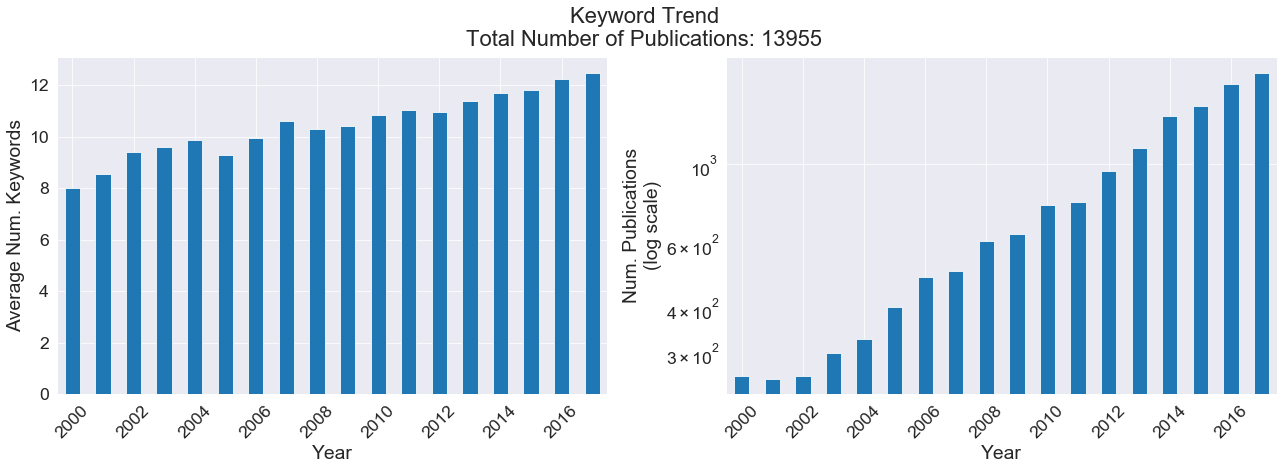

In [17]:
# Plot out the keyword trend. Can save the plot as an image if you give it a file location (will be saved in PNG format)
wos_plot.plot_kw_trend(filtered_corpora, title='Keyword Trend', save_plot_fn=False)

In [22]:
criteria = {
    'overarching': set(['uncertainty', 'adapt', 'decision support', 'management', 'gis']),
    'agri': set(['agricultur', 'farm']),
    'water': set(['hydrology', 'water', 'stream', 'aquifer']),
    'enviro': set(['environment', 'climate', 'ecology', 'ecosystem', 'biodivers']),
    'socio_economic': set(['ecosystem service', 'social', 'conflict', 'particip', 'law', 'stakehold', 'policy', 'economic'])
}

crit_matches = wosis.analysis.search.keyword_matches_by_criteria(filtered_corpora, criteria, threshold=95.0)

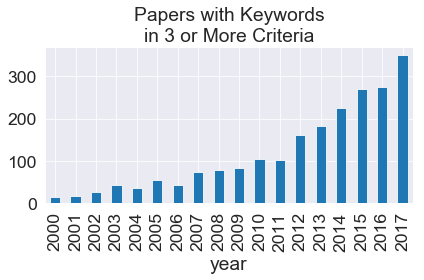

In [26]:
criteria_df = wosis.analysis.search.collate_keyword_criteria_matches(filtered_corpora, crit_matches)
wos_plot.plot_criteria_trend(criteria_df, threshold=3)